In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Loading Dataset

In [103]:
df_1 = pd.read_csv("data/full_dataset/goemotions_1.csv")
df_2 = pd.read_csv("data/full_dataset/goemotions_2.csv")
df_3 = pd.read_csv("data/full_dataset/goemotions_3.csv")

Displaying first 5 rows from each dataset

In [104]:
df_1.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
df_2.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,We can hope,ee3o3ko,darkenseyreth,EdmontonOilers,t3_ag4r9j,t1_ee3mhad,1.547529e+09,62,False,0,...,0,0,1,0,0,0,0,0,0,0
1,Shhh don't give them the idea!,eebl3z7,BoinkBoinkEtAliae,MurderedByWords,t3_ah3o76,t1_eeb68lo,1.547777e+09,76,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"Thank you so much, kind stranger. I really nee...",ed4fe9l,savageleaf,raisedbynarcissists,t3_abwh00,t1_ed4etbj,1.546482e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
3,Ion know but it would be better for you to jus...,efavtdu,CADDiLLXC,darknet,t3_al4njw,t3_al4njw,1.548800e+09,62,False,0,...,0,0,0,0,0,0,0,0,0,1
4,I'm honestly surprised. We should have fallen ...,ee2imz2,CorporalThornberry,CollegeBasketball,t3_afxt6t,t1_ee22nyr,1.547497e+09,55,False,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_3.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Worst ending ever! I won't spoil it but this o...,eee021b,tribaltrak,movies,t3_agxbsx,t3_agxbsx,1.547847e+09,42,False,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy cake day u/sneakpeekbot!,ed00f1z,InfernicFuse,danganronpa,t3_abajdo,t1_eczoocj,1.546328e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
2,Was he rejected because of his methodology or ...,ee1h5v1,OssToYouGoodSir,medicine,t3_aflo7s,t1_ee0v0vv,1.547464e+09,77,False,0,...,0,0,0,0,0,0,0,0,0,0
3,"thanks, I agree",eemi935,PMOFreeForever,NoFap,t3_ai7h09,t1_eelu54r,1.548088e+09,46,False,0,...,0,0,0,0,0,0,0,0,0,0
4,Why would you doubt it dumbass?,eduun99,ugliestman1,Tinder,t3_aejwne,t1_edumeal,1.547255e+09,36,False,0,...,0,0,0,0,0,0,0,0,0,0


Concanetating All Dataset into Singel DataFrame

In [107]:
df = pd.concat([df_1, df_2, df_3])
df.shape

(211225, 37)

Checking if the dataset contains NULL values or not

In [108]:
df.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

```The dataset does not contain any NULL values```

Checking if there is DUPLICATED data in the DataFrame

In [109]:
df.duplicated().sum()

np.int64(0)

```The dataset does not contain any DUPLICATED values```

DataFrame Information

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  confus

### Aggregating Rater Responses
The raw dataset contains multiple entries for the same Reddit comment because each comment was reviewed by multiple independent raters.

In this step, the data is being grouped by unique ID and Text.

In [149]:
id_counts = df['id'].value_counts()
print(id_counts.unique())
print("The comments were reviewed by up to 5 different people")

[5 4 3 2 1]
The comments were reviewed by up to 5 different people


In [150]:
emotion_columns = df.columns[9:]

In [151]:
grouped_df = df.groupby(['id', 'text'])[emotion_columns].sum().reset_index()
grouped_df.shape

(58011, 30)

In [152]:
grouped_df.head()

,id,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eczazk6,Fast as [NAME] will carry me. Seriously uptown...,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,eczb07q,You blew it. They played you like a fiddle.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,eczb527,So much time saved. Not.,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,eczb6r7,Emotes have a ridiculous amount of effort put ...,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,2


### Converting to Binary Labels
Converting the sums after grouping to binary values.

In [154]:
aggregated_df.head()

,id,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eczazk6,Fast as [NAME] will carry me. Seriously uptown...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,eczb07q,You blew it. They played you like a fiddle.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,eczb527,So much time saved. Not.,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,eczb6r7,Emotes have a ridiculous amount of effort put ...,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [155]:
unwanted_cols = ['id']

In [156]:
master_df = aggregated_df.drop(columns=unwanted_cols)

In [157]:
master_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Fast as [NAME] will carry me. Seriously uptown...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,You blew it. They played you like a fiddle.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,TL;DR No more Superbowls for [NAME]. Get ready...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,So much time saved. Not.,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Emotes have a ridiculous amount of effort put ...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [158]:
master_df.shape

(58011, 29)

### Feature and Label Extraction
Defining Text/Documents as X(Feature) and Emotions as Y(Labels)

In [159]:
X = master_df['text']

In [160]:
X.head()

0    Fast as [NAME] will carry me. Seriously uptown...
1          You blew it. They played you like a fiddle.
2    TL;DR No more Superbowls for [NAME]. Get ready...
3                             So much time saved. Not.
4    Emotes have a ridiculous amount of effort put ...
Name: text, dtype: object

In [161]:
y = master_df.iloc[:,1:]

In [162]:
y.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [163]:
cols_num_rows = y.sum(axis=0).sort_values(ascending = False)

Text(0.5, 1.0, 'Emotion Categories x No. of Samples')

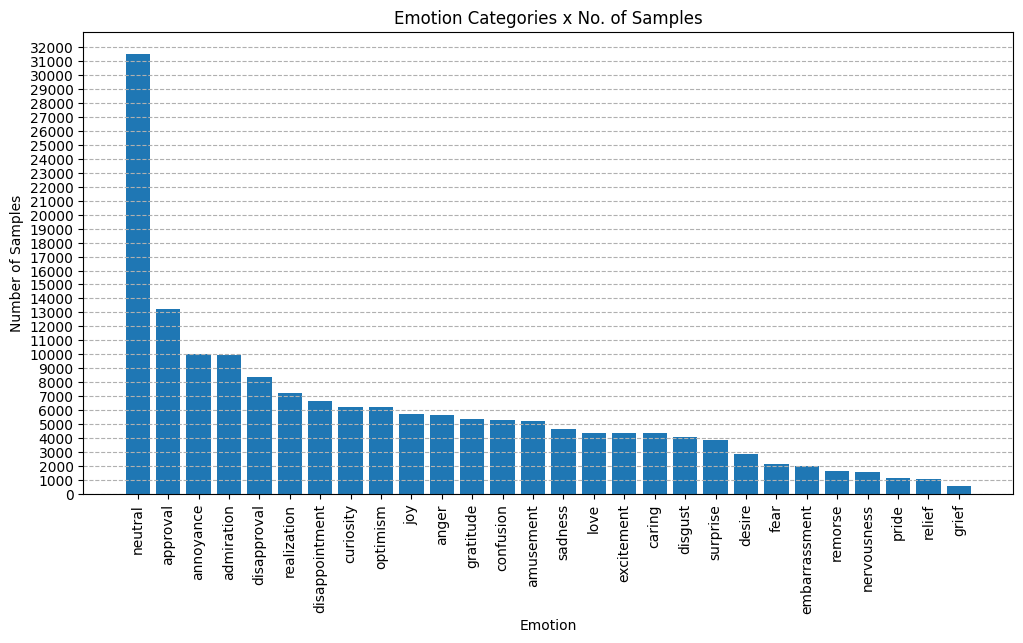

In [164]:
plt.figure(figsize=(12, 6))
plt.bar(cols_num_rows.index, cols_num_rows.values)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 33000, 1000))
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--')
plt.title("Emotion Categories x No. of Samples")

### Text Preprocessing

In [167]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    technical_punct = '"#$%&\'()*+,-./:;<=>@\\^_`{|}~'
    text = text.translate(str.maketrans(technical_punct, ' ' * len(technical_punct)))
    text = " ".join(text.split())
    return text

In [170]:
X = X.apply(clean_text)

In [171]:
X.head()

0    fast as will carry me seriously uptown to down...
1            you blew it they played you like a fiddle
2    tl dr no more superbowls for get ready for ano...
3                               so much time saved not
4    emotes have a ridiculous amount of effort put ...
Name: text, dtype: object

In [173]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rooneyish/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rooneyish/nltk_data...


True

In [174]:
lemmatizer = WordNetLemmatizer()

In [175]:
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [176]:
X = X.apply(lemmatize_text)

In [179]:
X.sample(5)

25692    they too wish they could be comfortable but th...
16556         thanks for being here we can always use ally
52710        nah man get made fun of more than anyone lmao
31311    i hired someone who previously worked for dunk...
45198    true you always gotta be careful it s pretty s...
Name: text, dtype: object

In [181]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [183]:
print(f"Training samples  : {len(X_train)}")  
print(f"Validation samples: {len(X_val)}")     
print(f"Test samples      : {len(X_test)}")

Training samples  : 40607
Validation samples: 8702
Test samples      : 8702
